# Imports

In [27]:
import sys
sys.path.append('../src/')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage import io
from skimage.transform import resize
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import seaborn as sns

from DataSetFactory import DataSet
from AMAP import AMAP

# Load Data Set
http://vision.stanford.edu/aditya86/ImageNetDogs/

In [38]:
def load_breed(breed_label, breed , breed_dir, output_shape):
    images_rgb = []
    images = []
    for file_name in glob(f'{breed_dir}/*'):
        images_rgb.append(np.array(Image.open(file_name)))
        images.append(resize(io.imread(file_name, as_gray=True), output_shape=output_shape).flatten())
    images = np.array(images)
    df = pd.DataFrame(images)
    feature_cols = df.columns
    df['label'] = breed_label
    df['breed'] = breed
    ds = DataSet(df, feature_cols, 'label')
    return ds, images_rgb

In [43]:
output_shape=(64, 64)
# load only golden and lbrador for now
image_net_dir = '../data/ImageNetDogs/Images/'
golden_dir = f'{image_net_dir}/n02099601-golden_retriever'
labrador_dir = f'{image_net_dir}/n02099712-Labrador_retriever'
chihuahua_dir = f'{image_net_dir}/n02085620-Chihuahua'

ds_golden, golden_images_rgb = load_breed(0, 'golden', golden_dir, output_shape)
ds_labrador, labrador_images_rgb = load_breed(1, 'labrador', labrador_dir, output_shape)
ds_chihuahua, chihuahua_images_rgb = load_breed(2, 'chihuahua', chihuahua_dir, output_shape)
df = pd.concat([ds_golden.df, ds_labrador.df, ds_chihuahua.df])

X = df[ds_golden.feature_cols].values
y = df[ds_golden.label_col].values

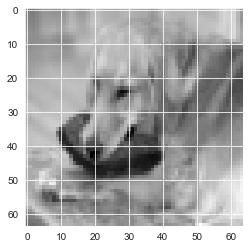

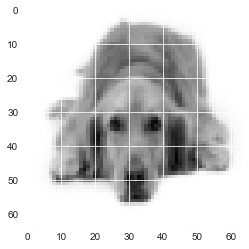

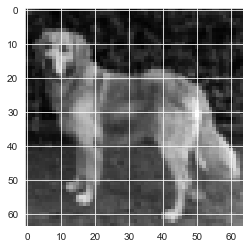

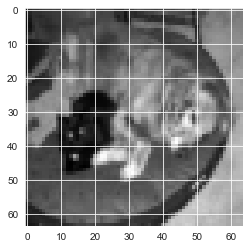

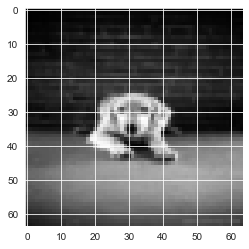

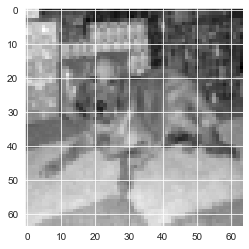

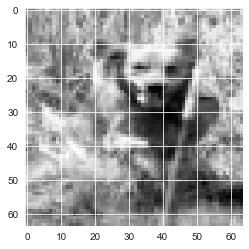

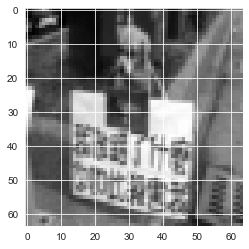

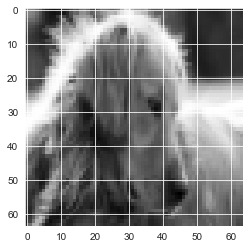

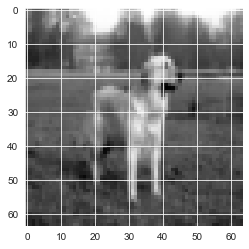

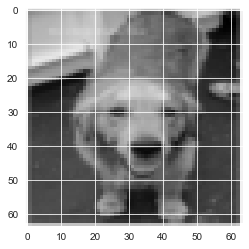

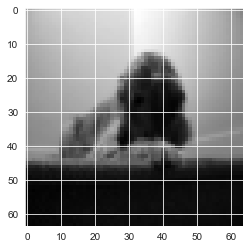

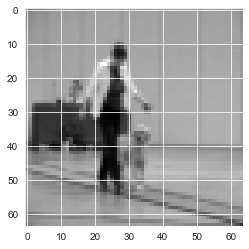

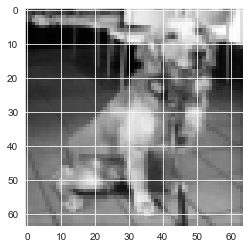

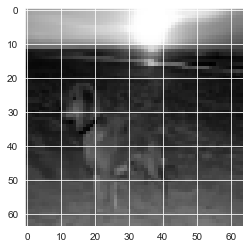

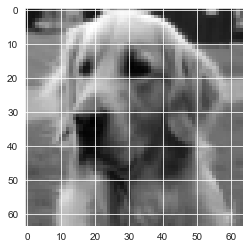

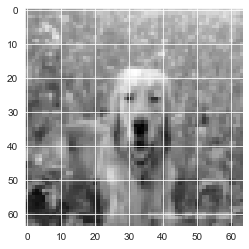

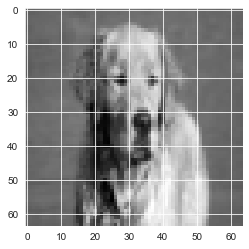

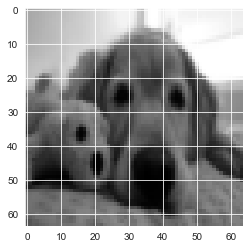

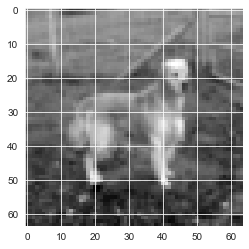

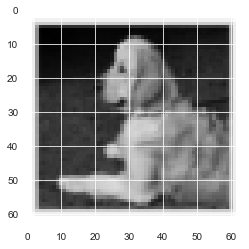

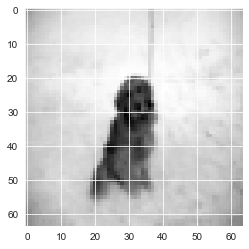

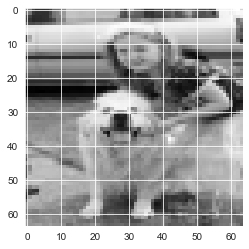

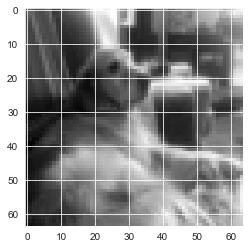

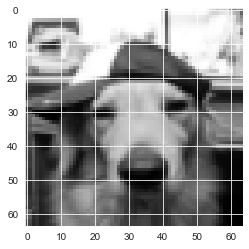

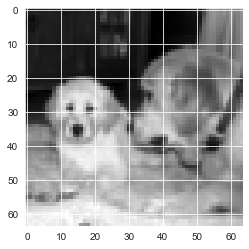

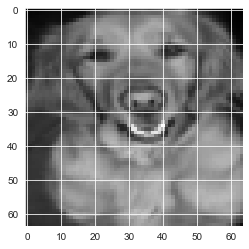

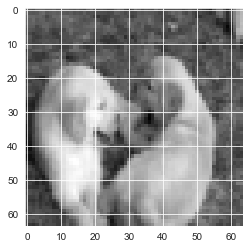

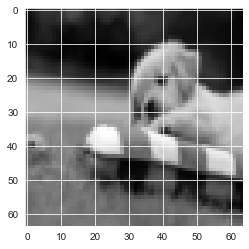

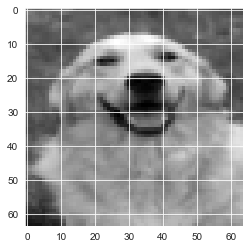

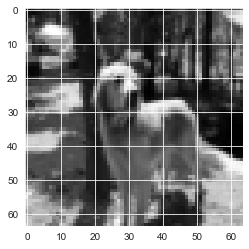

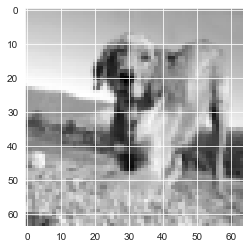

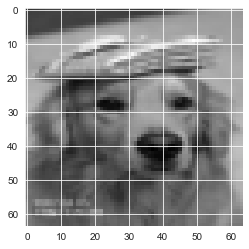

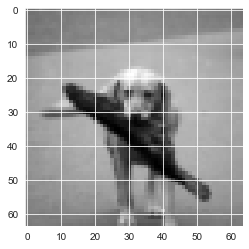

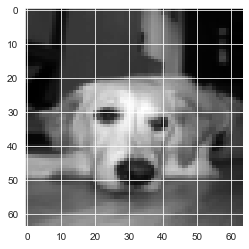

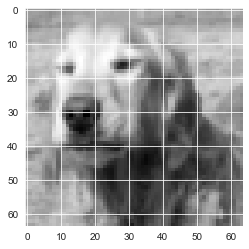

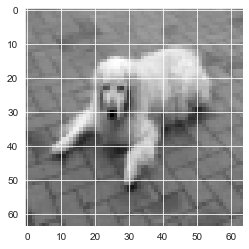

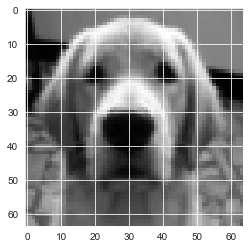

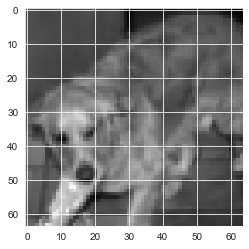

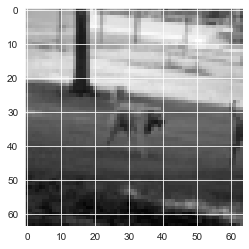

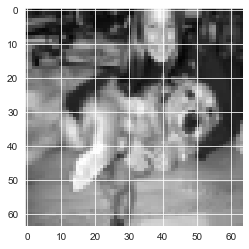

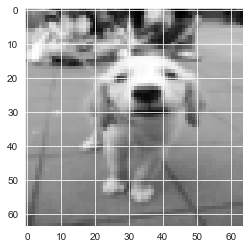

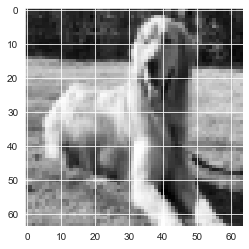

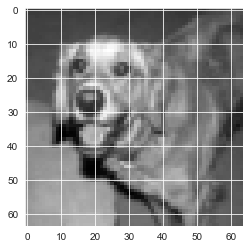

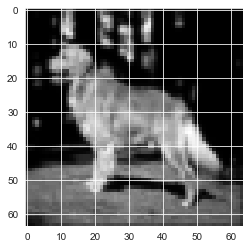

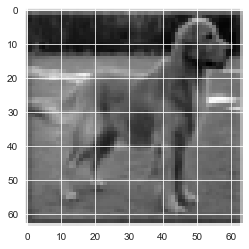

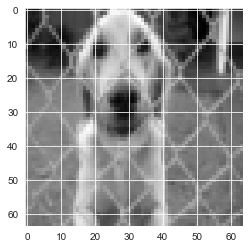

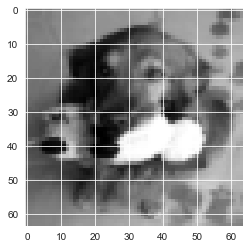

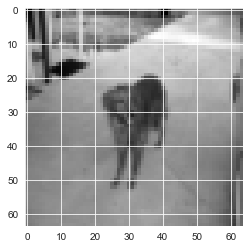

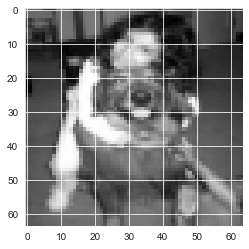

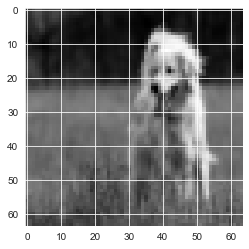

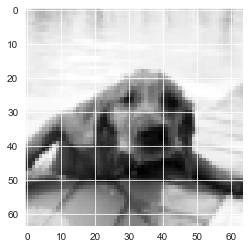

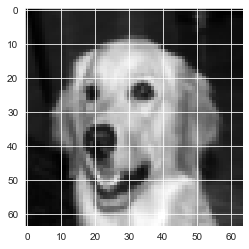

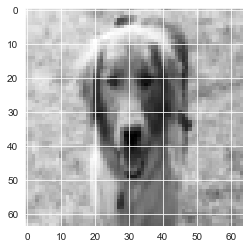

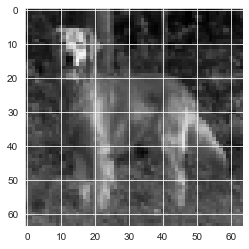

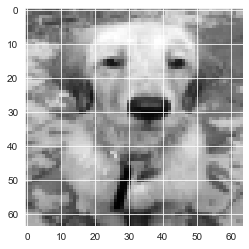

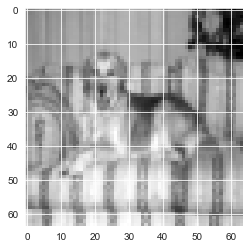

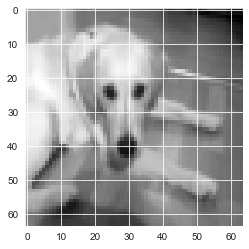

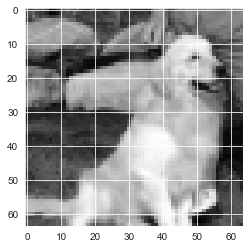

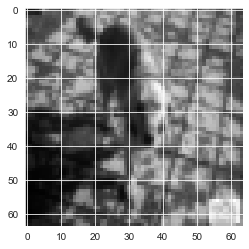

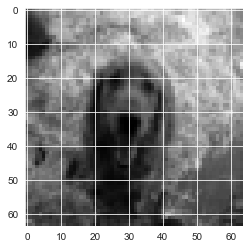

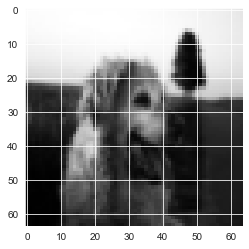

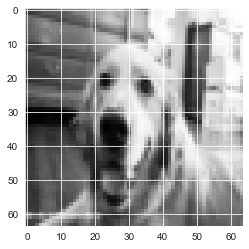

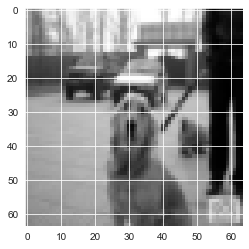

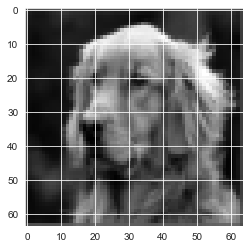

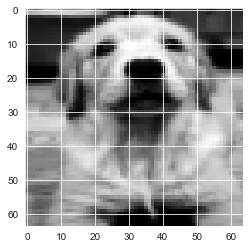

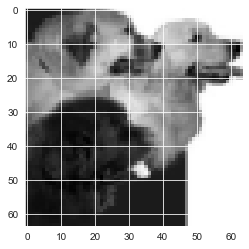

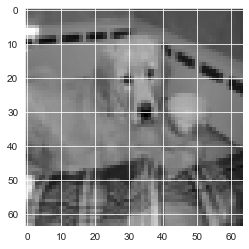

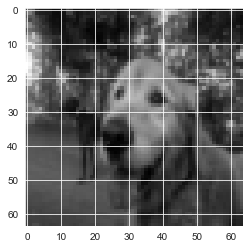

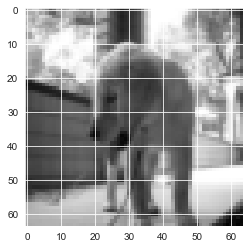

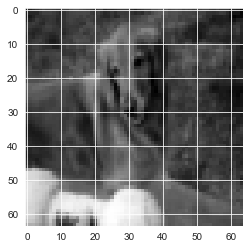

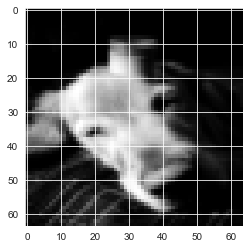

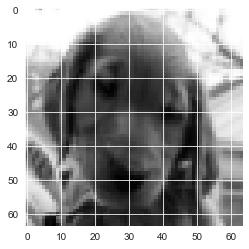

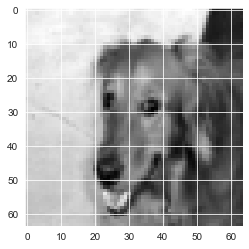

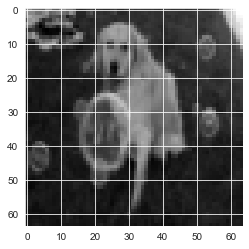

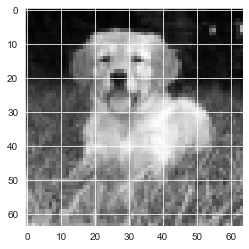

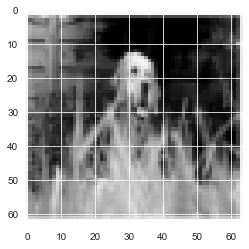

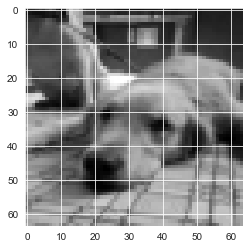

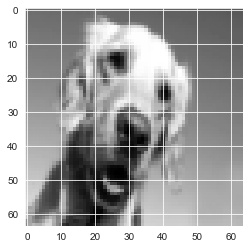

KeyboardInterrupt: 

In [44]:
# for i in range(len(ds_golden.df)):
# #     print(im.shape)
#     im = ds_golden.df[ds_golden.feature_cols].iloc[i].values.reshape(output_shape)
#     plt.imshow(im, cmap='gray')
#     plt.show()

## UMAP on original data

In [46]:
umap_result = UMAP().fit_transform(X)

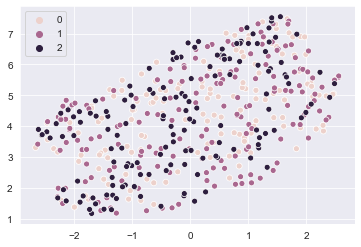

In [47]:
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=y)

AMAP
addr:@58c508
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=8
birch_branching_factor=50
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
self_relation=False
radius_q=1
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function AMAP.mse_loss at 0x0000025CC5260828>
loss='mse'
learning_rate=0.1
random_points_in_box=False
class_to_label=None
random_state=None
n_jobs=None
dataset='default'
show_fig=True
save_fig=True
is_plotly=False
do_animation=True
use_spline=False
alpha=1
output_dir='./plots/default/2020-02-03_15-50-18/'
num_clusters_each_label=[]
X_with_centroids=None
y_with_centroids=None
clusters=None
intra_class_anchors=None
intra_class_anchors_labels=None
intra_class_anchors_indices=None
anchors_indices=None
low_dim_anchors=None
low_dim_points=None
knng=None
inter_class_relations=None
inter_class_

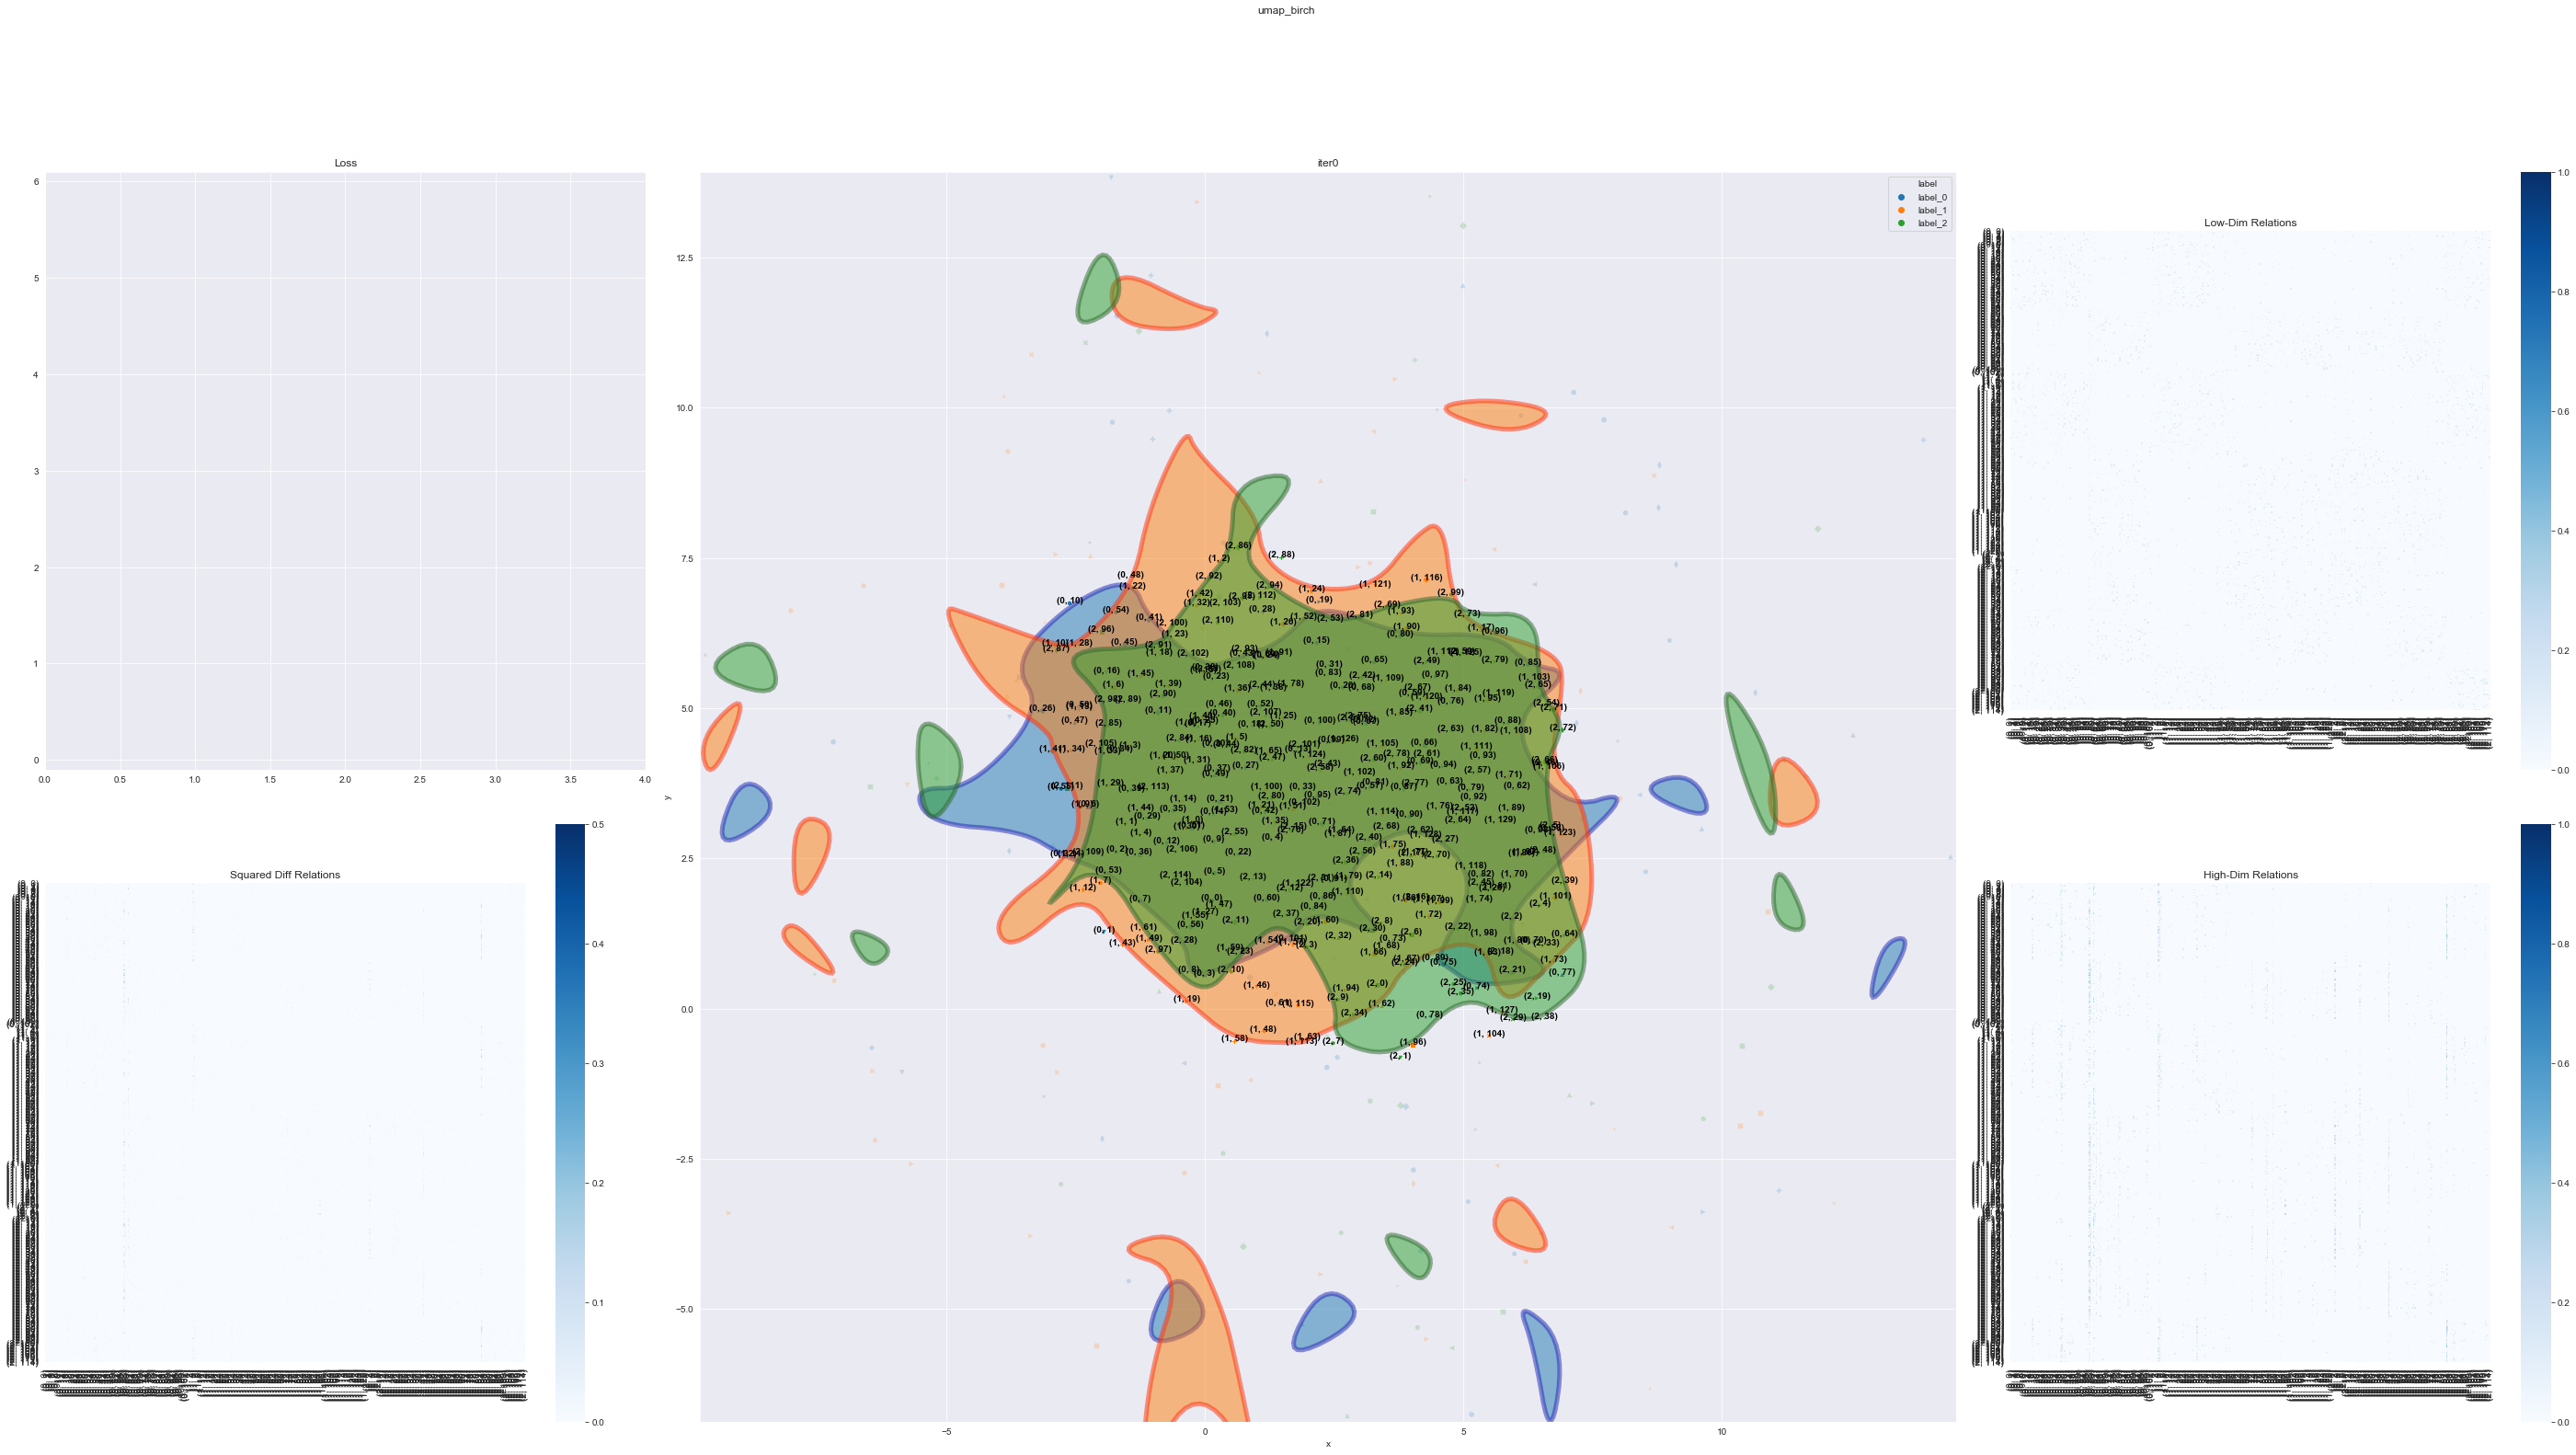

In [104]:
n_iter = 1
batch_size = 0
amap = AMAP(learning_rate=0.1, n_iter=n_iter, batch_size=batch_size, 
            anchors_method='birch', birch_threshold=8, birch_branching_factor=50)
print(amap)
low_dim = amap.fit_transform(X, y)

In [101]:
amap.low_dim_anchors.shape

(225, 2)

In [102]:
amap.anchors_radius

array([ 0.        , 12.65573224,  0.        , 10.47408489,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 11.93303754,
        0.        ,  0.        ,  8.07342919,  0.        ,  0.        ,
        8.91123081,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        5.77963947,  0.        , 14.71727334,  0.        ,  0.        ,
       12.33935899,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  7.43661602,  0.        ,
        0.        ,  0.        ,  9.05949572,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 10.47011017,  0.        ,  9.24084775, 14.61

In [103]:
amap.anchors_density

array([ 1, 17,  1,  5,  1,  1,  1,  1,  1,  7,  1,  1,  2,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1, 42,  1,  1, 14,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,
        2, 27,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  2,  1,  1,  1,  1,  1,
        4,  1,  1,  1,  1,  1,  1,  9,  1,  1,  5,  1,  6,  1,  2,  5,  1,
        1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,  7,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       29,  1,  2,  1,  2,  1,  1,  1,  2,  4,  1,  2,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3, 10,  1,  1,  1,  1,  1,
        4,  4,  1,  1,  2,  1,  1,  2,  1,  3,  3,  1,  1,  1,  1,  8,  1,
        4, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1], d